# Exercise 5: Create your own personal face recognition using SVM

## Instructions:

Create a directory in your google drive using this folder structure

```
My Drive
- Images
  - Train
    - Elizer
      - elizerimage1.jpg
      ...
    - Eliza
      - elizaimage1.jpg
      ...
    - Elijah
      - elijahimage1.jpg
      ...
  - Test
    - testimage1.jpg
    ...
```

- Upload 190 images of your self (selfied are recommended) in the Train folder
- Upload 190 images of your partner in the Train folder
- Upload 10 images each of yourself and your partner in the Test Folder (30 images total for each member)
- Use **.png** or **.jpg** or **.jpeg** images files

In [85]:
pip install numpy opencv-python scikit-learn

## Import libraries

In [86]:
import os
import cv2
import numpy as np
from PIL import Image  # PIL is used to load the image
import matplotlib.pyplot as plt

## Mount Google Drive

In [87]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Display one raw image directly from your drive

In [88]:
def displayImage(image_path):
  # Path to your image file in Google Drive
  image = Image.open(image_path)

  # Display the image using matplotlib
  plt.imshow(image)
  plt.axis('on')  # Hide axes for cleaner display
  plt.show()

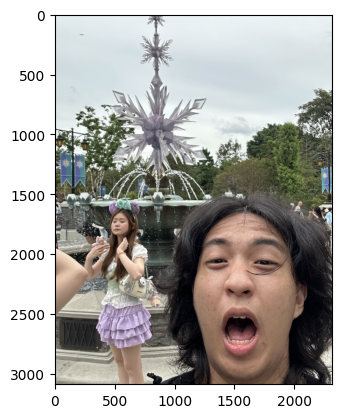

In [89]:
displayImage('/content/drive/My Drive/Images/Train/Matthew/01.png')

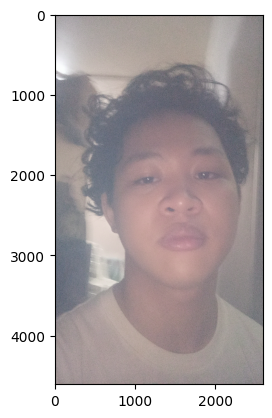

In [90]:
displayImage('/content/drive/My Drive/Images/Train/Custer/IMG20250930211411.jpg')

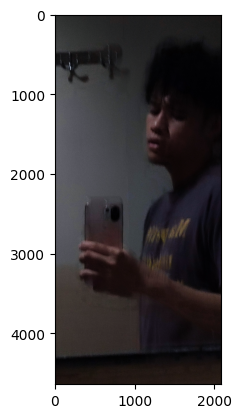

In [91]:
displayImage('/content/drive/My Drive/Images/Train/Stephen/IMG_20250521_214449.jpg')

##CREATE THE FUNCTION

In [92]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, person in enumerate(os.listdir(folder)):
        person_folder = os.path.join(folder, person)
        person_name = os.path.basename(person_folder)
        for filename in os.listdir(person_folder):
            img_path = os.path.join(person_folder, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = cv2.resize(img, (100, 100))  # Resize to 100x100 pixels
            images.append(img.flatten())  # Flatten the image
            labels.append(person_name)
    return np.array(images), np.array(labels)

## 2. Load the images from your drive and apply preprocessing to your raw images

In [56]:
images, labels = load_images_from_folder('/content/drive/My Drive/Images/Train')


In [57]:
images.shape

(590, 10000)

## 3. Display one pre-processed image from the training set

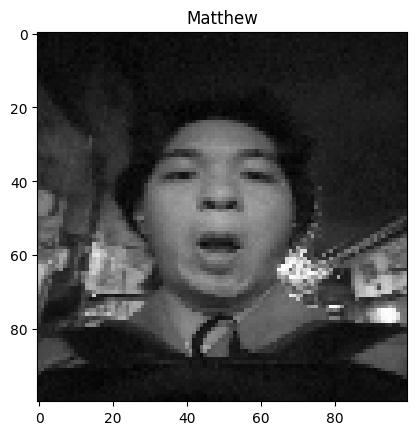

In [58]:

# Get a sample image and its corresponding name
image = images[4].reshape(100,100)  # Access the first image
name = labels[4]  # Get the name corresponding to the image

# Display the image
plt.imshow(image, cmap="gray")
plt.title(name)
plt.axis('on')  # Hide axes
plt.show()

In [59]:
labels


array(['Matthew', 'Matthew', 'Matthew', 'Matthew', 'Matthew', 'Matthew',
       'Matthew', 'Matthew', 'Matthew', 'Matthew', 'Matthew', 'Matthew',
       'Matthew', 'Matthew', 'Matthew', 'Matthew', 'Matthew', 'Matthew',
       'Matthew', 'Matthew', 'Matthew', 'Matthew', 'Matthew', 'Matthew',
       'Matthew', 'Matthew', 'Matthew', 'Matthew', 'Matthew', 'Matthew',
       'Matthew', 'Matthew', 'Matthew', 'Matthew', 'Matthew', 'Matthew',
       'Matthew', 'Matthew', 'Matthew', 'Matthew', 'Matthew', 'Matthew',
       'Matthew', 'Matthew', 'Matthew', 'Matthew', 'Matthew', 'Matthew',
       'Matthew', 'Matthew', 'Matthew', 'Matthew', 'Matthew', 'Matthew',
       'Matthew', 'Matthew', 'Matthew', 'Matthew', 'Matthew', 'Matthew',
       'Matthew', 'Matthew', 'Matthew', 'Matthew', 'Matthew', 'Matthew',
       'Matthew', 'Matthew', 'Matthew', 'Matthew', 'Matthew', 'Matthew',
       'Matthew', 'Matthew', 'Matthew', 'Matthew', 'Matthew', 'Matthew',
       'Matthew', 'Matthew', 'Matthew', 'Matthew', 

## 4. Display ten pre-processed images from the training set

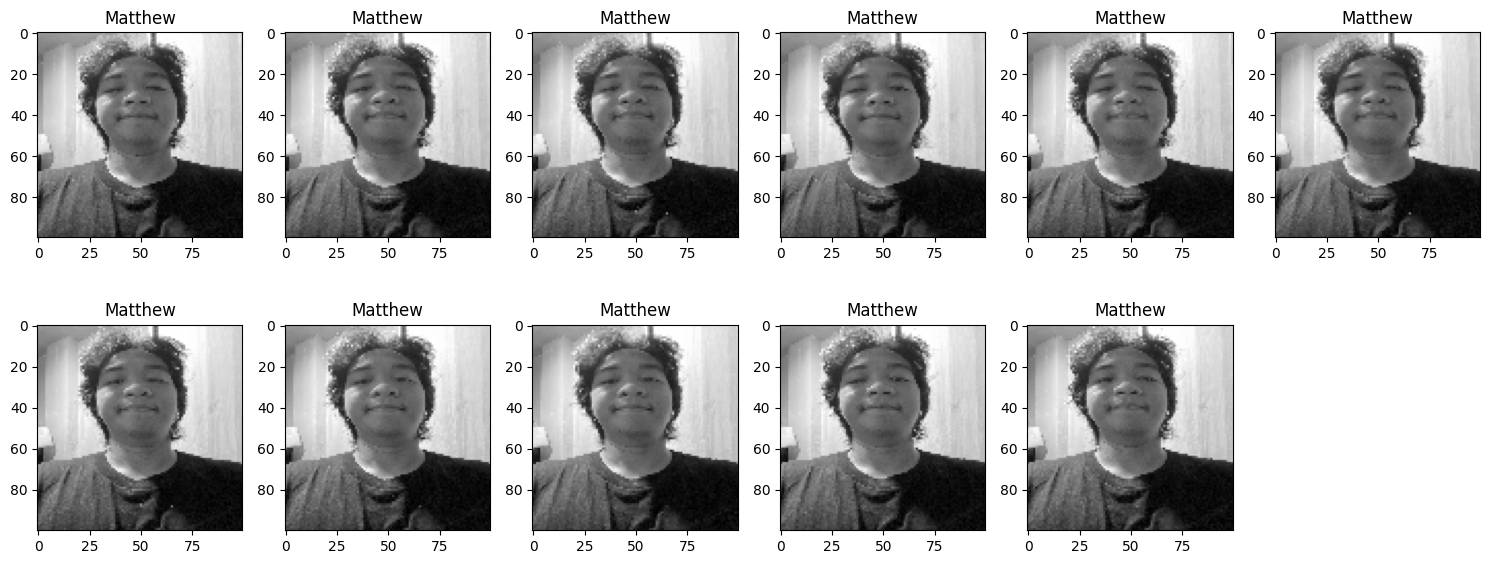

In [60]:
start_index = 74
end_index = 85  # Exclusive end index

num_faces = end_index - start_index

# Adjust the subplot grid to accommodate the number of images

fig, axes = plt.subplots(2, 6, figsize=(15, 6))
axes = axes.flatten()  # Flatten the array of axes for easy indexing
# Loop to display the images
for i in range(num_faces):
    image_index = start_index + i
    image = images[image_index].reshape(100,100)
    name = labels[image_index]

    axes[i].imshow(image, cmap='gray')  # Show the image
    axes[i].set_title(name)  # Set the title to the name
    axes[i].axis('on')  # Hide axes

for j in range(num_faces, len(axes)):
    axes[j].axis('off')
# Adjust layout
plt.tight_layout()
plt.show()

## 5. Split your training data

In [61]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


## 6. Train your SVM model

In [62]:

from sklearn import svm

model = svm.SVC(gamma='scale')  # You can choose different kernels like 'linear', 'rbf', etc.
model.fit(X_train, y_train)

SVC()

## 7. Evaluate your SVM model

In [63]:

from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 87.29%


## 8. Test your model using images not in your training set

:Use your SVM model to predict the label of all of your images in the Test folder

In [64]:
def predict_image(img_path, model):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)  # Flatten and reshape for prediction
    prediction = model.predict(img)
    return prediction

Predicted label: ['Matthew']


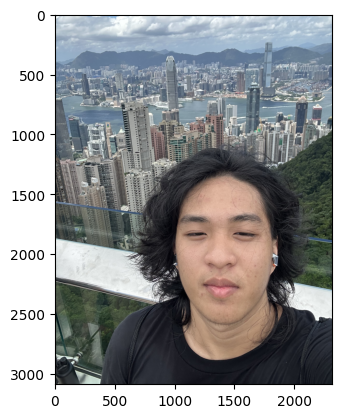

In [149]:

img_path = '/content/drive/My Drive/Images/Test/1.png'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Matthew']


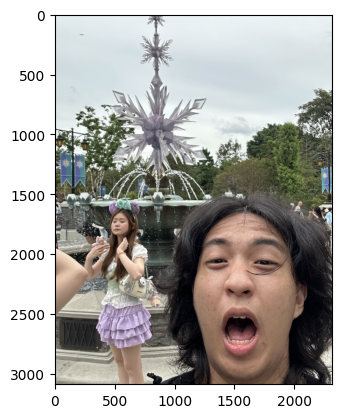

In [150]:
img_path = '/content/drive/My Drive/Images/Test/01.png'
result = predict_image(img_path, model)
if result is not None:
  print(f'Predicted label:', result)
  displayImage(img_path)

Predicted label: ['Matthew']


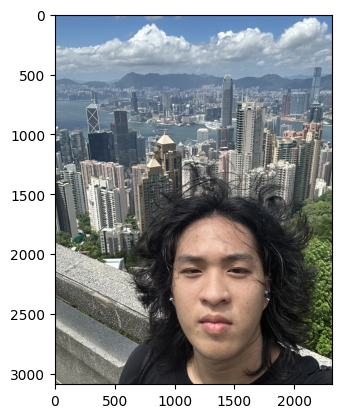

In [151]:
img_path = '/content/drive/My Drive/Images/Test/2.png'
result = predict_image(img_path, model)
if result is not None:
  print(f'Predicted label:', result)
  displayImage(img_path)

Predicted label: ['Matthew']


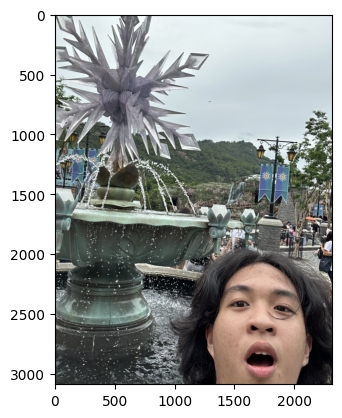

In [152]:
img_path = '/content/drive/My Drive/Images/Test/3.png'
result = predict_image(img_path, model)
if result is not None:
  print(f'Predicted label:', result)
  displayImage(img_path)

Predicted label: ['Matthew']


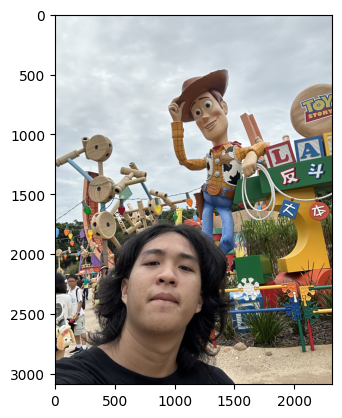

In [153]:
img_path = '/content/drive/My Drive/Images/Test/4.png'
result = predict_image(img_path, model)
if result is not None:
  print(f'Predicted label:', result)
  displayImage(img_path)

Predicted label: ['Matthew']


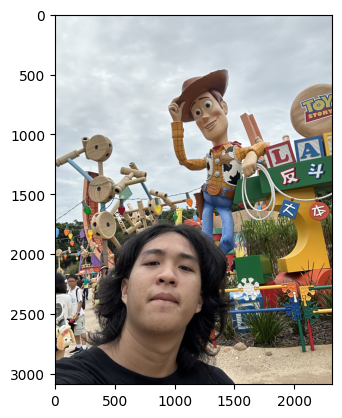

In [154]:
img_path = '/content/drive/My Drive/Images/Test/4.png'
result = predict_image(img_path, model)
if result is not None:
  print(f'Predicted label:', result)
  displayImage(img_path)

Predicted label: ['Matthew']


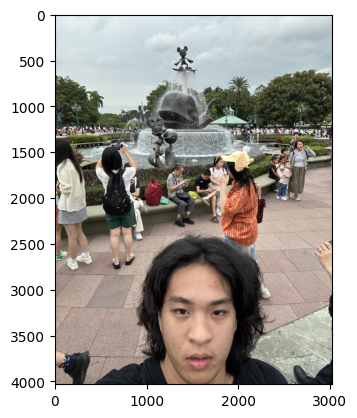

In [155]:
img_path = '/content/drive/My Drive/Images/Test/6.png'
result = predict_image(img_path, model)
if result is not None:
  print(f'Predicted label:', result)
  displayImage(img_path)

Predicted label: ['Matthew']


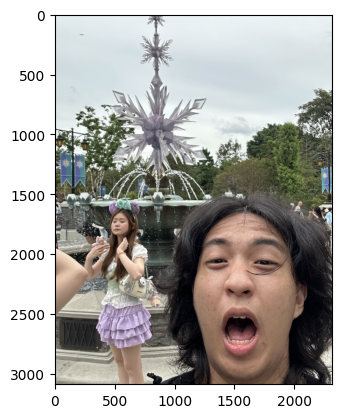

In [160]:
img_path = '/content/drive/My Drive/Images/Test/01.png'
result = predict_image(img_path, model)
if result is not None:
  print(f'Predicted label:', result)
  displayImage(img_path)

Predicted label: ['Matthew']


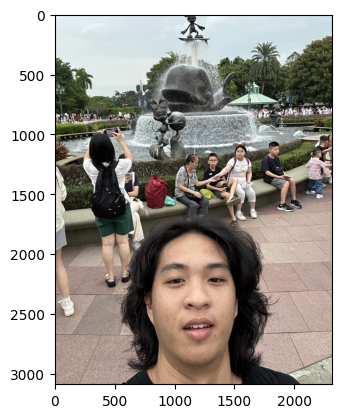

In [157]:
img_path = '/content/drive/My Drive/Images/Test/8.png'
result = predict_image(img_path, model)
if result is not None:
  print(f'Predicted label:', result)
  displayImage(img_path)

Predicted label: ['Matthew']


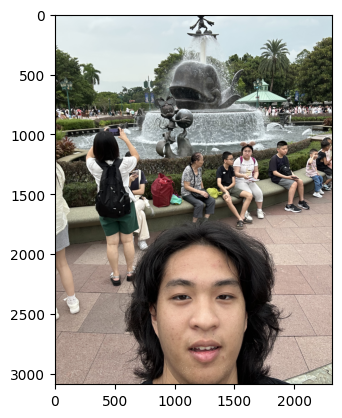

In [158]:
img_path = '/content/drive/My Drive/Images/Test/9.png'
result = predict_image(img_path, model)
if result is not None:
  print(f'Predicted label:', result)
  displayImage(img_path)

Predicted label: ['Custer']


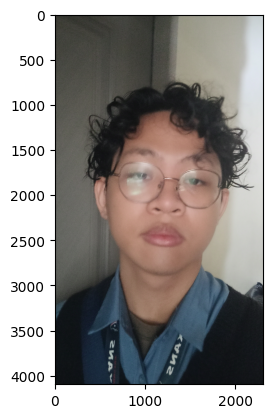

In [159]:
img_path = '/content/drive/My Drive/Images/Test/11.jpg'
result = predict_image(img_path, model)
if result is not None:
  print(f'Predicted label:', result)
  displayImage(img_path)

Predicted label: ['Custer']


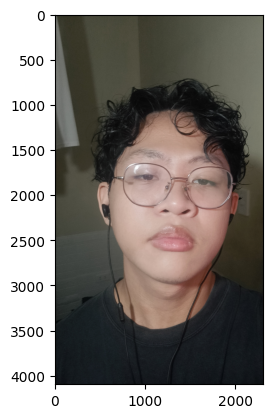

In [117]:
img_path = '/content/drive/My Drive/Images/Test/12.jpg'
result = predict_image(img_path, model)
if result is not None:
  print(f'Predicted label:', result)
  displayImage(img_path)

Predicted label: ['Custer']


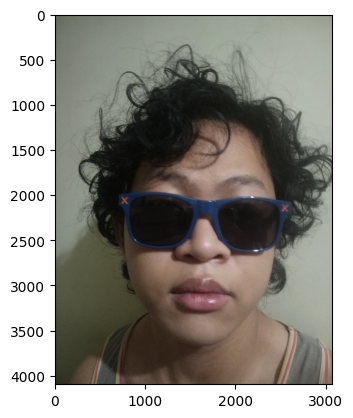

In [123]:
img_path = '/content/drive/My Drive/Images/Test/13.jpg'
result = predict_image(img_path, model)
if result is not None:
  print(f'Predicted label:', result)
  displayImage(img_path)

Predicted label: ['Custer']


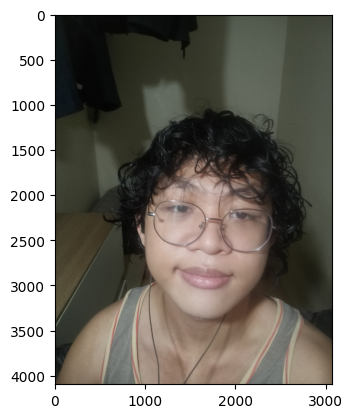

In [128]:
img_path = '/content/drive/My Drive/Images/Test/14.jpg'
result = predict_image(img_path, model)
if result is not None:
  print(f'Predicted label:', result)
  displayImage(img_path)

Predicted label: ['Custer']


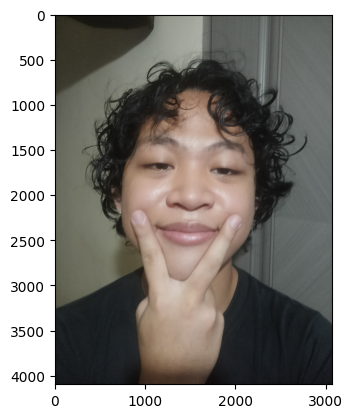

In [129]:
img_path = '/content/drive/My Drive/Images/Test/15.jpg'
result = predict_image(img_path, model)
if result is not None:
  print(f'Predicted label:', result)
  displayImage(img_path)

Predicted label: ['Custer']


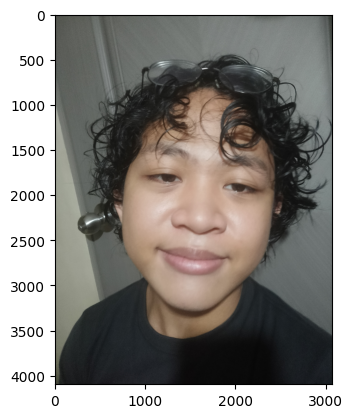

In [130]:
img_path = '/content/drive/My Drive/Images/Test/16.jpg'
result = predict_image(img_path, model)
if result is not None:
  print(f'Predicted label:', result)
  displayImage(img_path)

Predicted label: ['Custer']


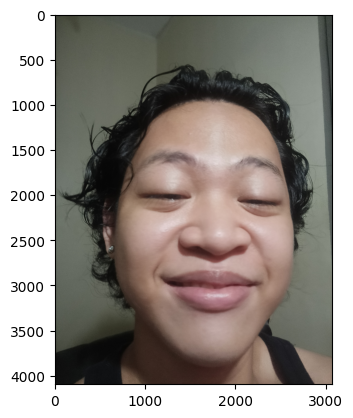

In [131]:
img_path = '/content/drive/My Drive/Images/Test/17.jpg'
result = predict_image(img_path, model)
if result is not None:
  print(f'Predicted label:', result)
  displayImage(img_path)

Predicted label: ['Custer']


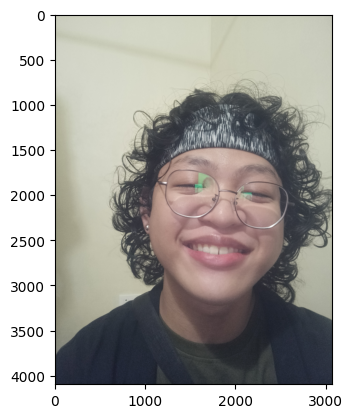

In [132]:
img_path = '/content/drive/My Drive/Images/Test/18.jpg'
result = predict_image(img_path, model)
if result is not None:
  print(f'Predicted label:', result)
  displayImage(img_path)

Predicted label: ['Custer']


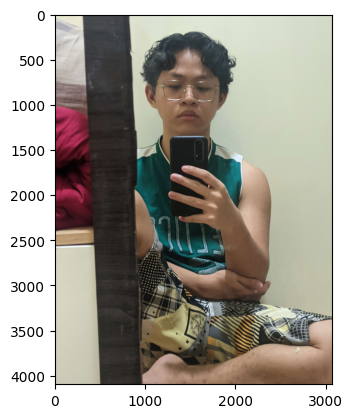

In [133]:
img_path = '/content/drive/My Drive/Images/Test/19.jpg'
result = predict_image(img_path, model)
if result is not None:
  print(f'Predicted label:', result)
  displayImage(img_path)

Predicted label: ['Stephen']


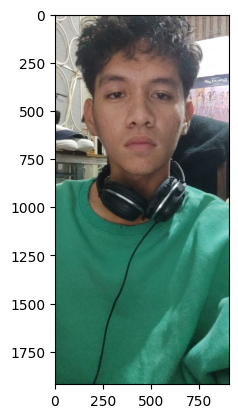

In [145]:
img_path = '/content/drive/My Drive/Images/Test/20.jpeg'
result = predict_image(img_path, model)
if result is not None:
  print(f'Predicted label:', result)
  displayImage(img_path)

Predicted label: ['Stephen']


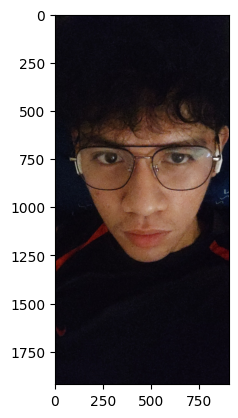

In [161]:
img_path = '/content/drive/My Drive/Images/Test/21.jpeg'
result = predict_image(img_path, model)
if result is not None:
  print(f'Predicted label:', result)
  displayImage(img_path)

Predicted label: ['Stephen']


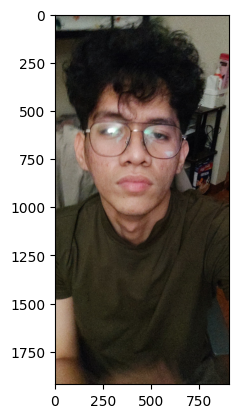

In [142]:
img_path = '/content/drive/My Drive/Images/Test/22.jpeg'
result = predict_image(img_path, model)
if result is not None:
  print(f'Predicted label:', result)
  displayImage(img_path)

Predicted label: ['Stephen']


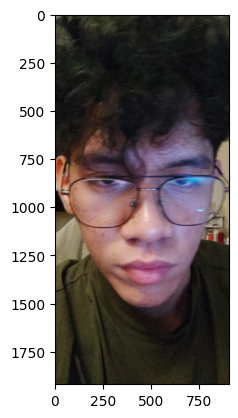

In [141]:
img_path = '/content/drive/My Drive/Images/Test/23.jpeg'
result = predict_image(img_path, model)
if result is not None:
  print(f'Predicted label:', result)
  displayImage(img_path)

Predicted label: ['Stephen']


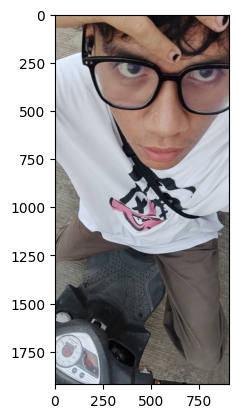

In [140]:
img_path = '/content/drive/My Drive/Images/Test/24.jpeg'
result = predict_image(img_path, model)
if result is not None:
  print(f'Predicted label:', result)
  displayImage(img_path)

Predicted label: ['Stephen']


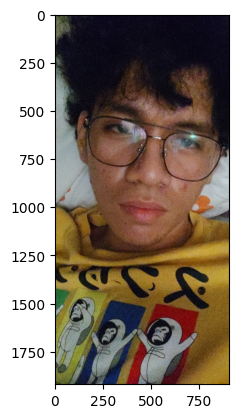

In [139]:
img_path = '/content/drive/My Drive/Images/Test/25.jpeg'
result = predict_image(img_path, model)
if result is not None:
  print(f'Predicted label:', result)
  displayImage(img_path)

Predicted label: ['Custer']


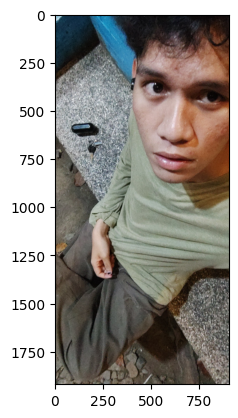

In [137]:
img_path = '/content/drive/My Drive/Images/Test/26.jpeg'
result = predict_image(img_path, model)
if result is not None:
  print(f'Predicted label:', result)
  displayImage(img_path)

Predicted label: ['Stephen']


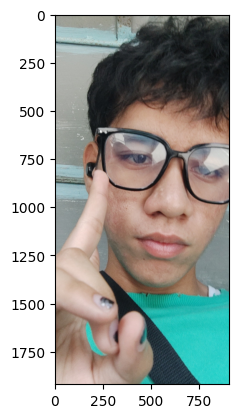

In [138]:
img_path = '/content/drive/My Drive/Images/Test/27.jpeg'
result = predict_image(img_path, model)
if result is not None:
  print(f'Predicted label:', result)
  displayImage(img_path)

Predicted label: ['Stephen']


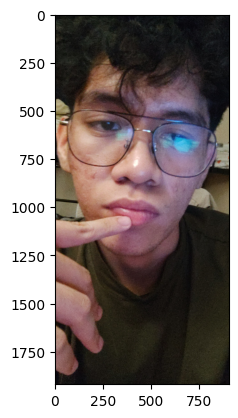

In [136]:
img_path = '/content/drive/My Drive/Images/Test/28.jpeg'
result = predict_image(img_path, model)
if result is not None:
  print(f'Predicted label:', result)
  displayImage(img_path)

Predicted label: ['Stephen']


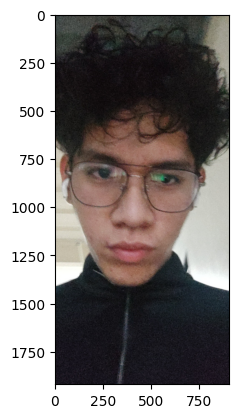

In [135]:
img_path = '/content/drive/My Drive/Images/Test/29.jpeg'
result = predict_image(img_path, model)
if result is not None:
  print(f'Predicted label:', result)
  displayImage(img_path)